In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix

In [2]:
data = pd.read_csv('PS_20174392719_1491204439457_log.csv')
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


# Data Overview and Processing 

In [3]:
# check data type of each column
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [4]:
#  there is no mssing value
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
# there is no duplicate rows
data.duplicated().sum()

0

In [6]:
# basic statistical info
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
# remove unnecessary columns
data = data.drop(columns=['nameOrig', 'nameDest'])
data.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.0,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0,0
5,1,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0,0
6,1,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0,0
7,1,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0,0
8,1,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0,0
9,1,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0,0


In [8]:
tran_type = data.groupby('type')['amount'].count()
tran_type

type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
Name: amount, dtype: int64

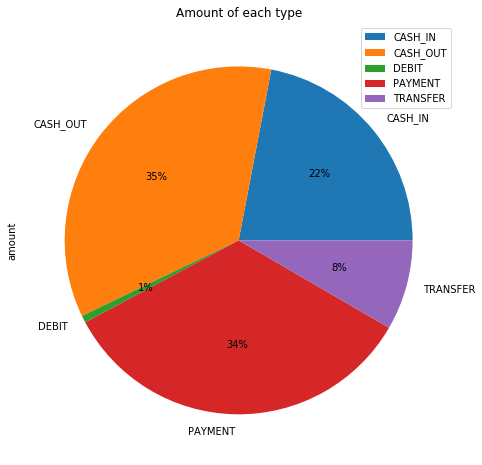

In [9]:
pie_plot = tran_type.plot.pie(figsize=(12, 8), autopct='%1.0f%%')
pie_plot.legend(loc="upper right")
plt.title('Amount of each type')
plt.show()

In [10]:
am_type = data.groupby('type')['amount'].sum()
am_type

type
CASH_IN     2.363674e+11
CASH_OUT    3.944130e+11
DEBIT       2.271992e+08
PAYMENT     2.809337e+10
TRANSFER    4.852920e+11
Name: amount, dtype: float64

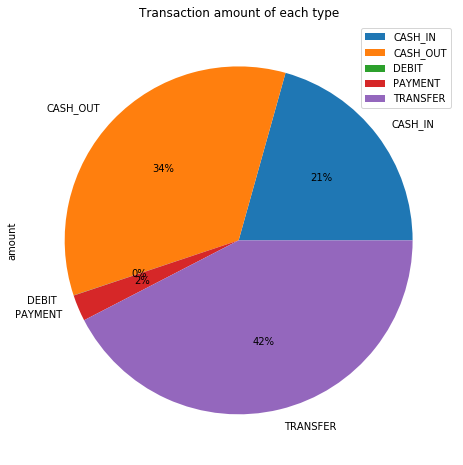

In [11]:
pie_plot = am_type.plot.pie(figsize=(12, 8), autopct='%1.0f%%')
pie_plot.legend(loc="upper right")
plt.title('Transaction amount of each type')
plt.show()

In [12]:
fraud_cnt = data['isFraud'].sum()
not_fraud_cnt = len(data)-fraud_cnt

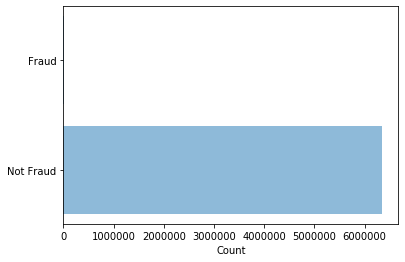

In [13]:
objects = ('Not Fraud', 'Fraud')
y_pos = np.arange(len(objects))
performance = [not_fraud_cnt, fraud_cnt]
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Count')
plt.show()

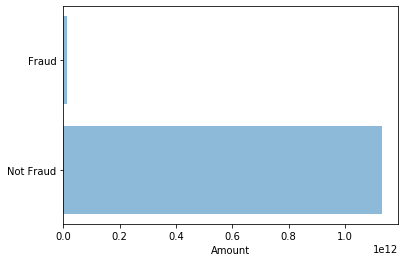

In [14]:
fraud_amount = data[data['isFraud']==1]['amount'].sum()
not_fraud_amount = data[data['isFraud']==0]['amount'].sum()

y_pos = np.arange(len(objects))
performance_amount = [not_fraud_amount, fraud_amount]
plt.barh(y_pos, performance_amount, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Amount')
plt.show()

In [15]:
data = pd.get_dummies(data, prefix=['type'])
data.head(10)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.0,0.00,0,0,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.0,0.00,0,0,0,0,0,1,0
2,1,181.00,181.00,0.00,0.0,0.00,1,0,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.0,0.00,1,0,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.0,0.00,0,0,0,0,0,1,0
5,1,7817.71,53860.00,46042.29,0.0,0.00,0,0,0,0,0,1,0
6,1,7107.77,183195.00,176087.23,0.0,0.00,0,0,0,0,0,1,0
7,1,7861.64,176087.23,168225.59,0.0,0.00,0,0,0,0,0,1,0
8,1,4024.36,2671.00,0.00,0.0,0.00,0,0,0,0,0,1,0
9,1,5337.77,41720.00,36382.23,41898.0,40348.79,0,0,0,0,1,0,0


In [16]:
# change the order of columns
cols = ['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'type_CASH_IN',
 'type_CASH_OUT',
 'type_DEBIT',
 'type_PAYMENT',
 'type_TRANSFER',
 'isFraud',
 'isFlaggedFraud',]
data = data[cols]
data.head(10)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.0,0.00,0,0,0,1,0,0,0
1,1,1864.28,21249.00,19384.72,0.0,0.00,0,0,0,1,0,0,0
2,1,181.00,181.00,0.00,0.0,0.00,0,0,0,0,1,1,0
3,1,181.00,181.00,0.00,21182.0,0.00,0,1,0,0,0,1,0
4,1,11668.14,41554.00,29885.86,0.0,0.00,0,0,0,1,0,0,0
5,1,7817.71,53860.00,46042.29,0.0,0.00,0,0,0,1,0,0,0
6,1,7107.77,183195.00,176087.23,0.0,0.00,0,0,0,1,0,0,0
7,1,7861.64,176087.23,168225.59,0.0,0.00,0,0,0,1,0,0,0
8,1,4024.36,2671.00,0.00,0.0,0.00,0,0,0,1,0,0,0
9,1,5337.77,41720.00,36382.23,41898.0,40348.79,0,0,1,0,0,0,0


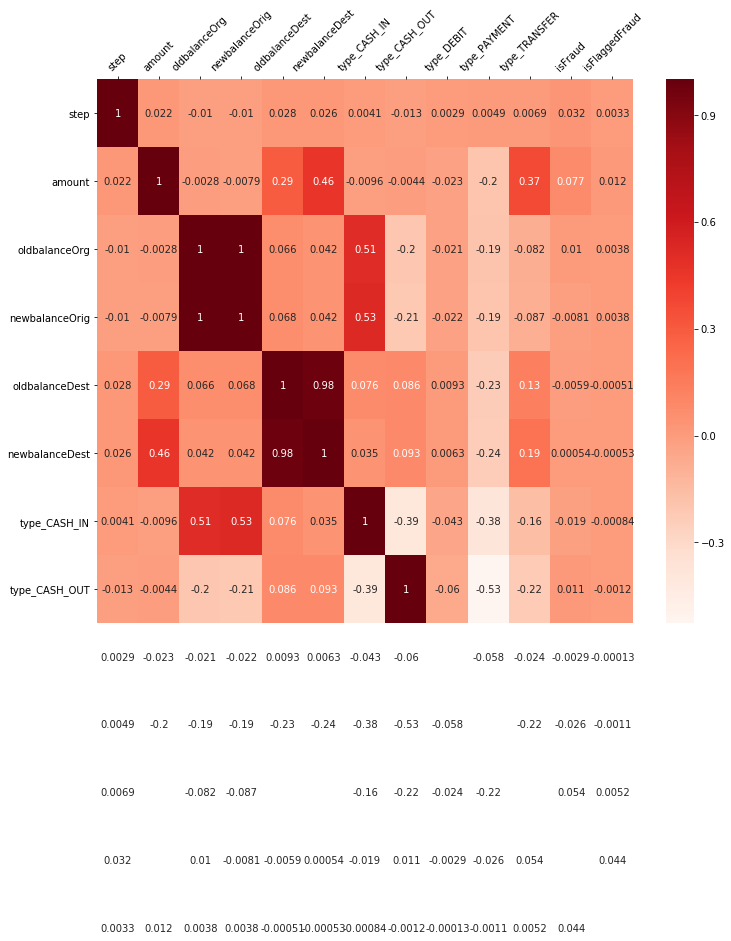

In [17]:
# check correlation between different variables and make a heatmap
plt.figure(figsize=(12, 10))
cor = data.corr()
ax = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
ax.set_ylim(8, 0)
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()


# Models and Evaluation

•  This dataset is extremely imbalanced, so I choose F1-score and Confusion Matrix as metric instead of accuracy.<br>
•  I will use three models to make classification: Logistic Regression, Decision Tree and XGBoost.<br>
•  Dataset will be splited in to training data and validation data. Both of the performance will be compared in order to detect potential overfitting issue.<br>
•  F1-score of Logistic Regression model is 0.59.<br>
•  F1-score of Decision Tree model is 0.87(overfitting might occurr).<br>
•  F1-score of XGBoost model is 0.61.<br>
•  Logistics Regression model as a baseline model has the lowest F1-score. Decision Tree model has the best performance, but it still needs to be improved. <br>
•  Confusion Matrix is shown as follow. XGBoost model successfully detected most fraudulent transactions, thouth its F1-score is not high. XGBoot model can handle imbalanced data because it gives minority class more weight. 

In [18]:
# split target and features 
data = data.drop(columns=['isFlaggedFraud']) #we don't use this column in prediction.
y = data.pop('isFraud')
X = data

In [19]:
# split traing data and validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 2)
# standardize features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

### Model One: Logistic Regression

In [20]:
lr_clf = LogisticRegression(random_state = 2).fit(X_train, y_train)
y_train_pred = lr_clf.predict(X_train)
lr_train_f1 = f1_score(y_train, y_train_pred)
lr_train_cm = confusion_matrix(y_train, y_train_pred)
print('F1-score of training data: ' + str(lr_train_f1))
print('Confusion matrix of training data: \n' + str(lr_train_cm))

y_val_pred = lr_clf.predict(X_val)
lr_val_f1 = f1_score(y_val, y_val_pred)
lr_val_cm = confusion_matrix(y_val, y_val_pred)
print('F1-score of validation data: ' + str(lr_val_f1))
print('Confusion matrix of validation data: \n' + str(lr_val_cm))

F1-score of training data: 0.5900863842040314
Confusion matrix of training data: 
[[5083241     241]
 [   3745    2869]]
F1-score of validation data: 0.5946632782719187
Confusion matrix of validation data: 
[[1270865      60]
 [    897     702]]


### Model Two: Decision Tree

In [21]:
dt_clf = DecisionTreeClassifier(random_state = 2).fit(X_train, y_train)
y_train_pred = dt_clf.predict(X_train)
dt_train_f1 = f1_score(y_train, y_train_pred)
dt_train_cm = confusion_matrix(y_train, y_train_pred)
print('F1-score of training data: ' + str(dt_train_f1))
print('Confusion matrix of training data: \n' + str(dt_train_cm))

y_val_pred = dt_clf.predict(X_val)
dt_val_f1 = f1_score(y_val, y_val_pred)
dt_val_cm = confusion_matrix(y_val, y_val_pred)
print('F1-score of validation data: ' + str(dt_val_f1))
print('Confusion matrix of validation data: \n' + str(dt_val_cm))

F1-score of training data: 1.0
Confusion matrix of training data: 
[[5083482       0]
 [      0    6614]]
F1-score of validation data: 0.8677450047573739
Confusion matrix of validation data: 
[[1270739     186]
 [    231    1368]]


### Model Three: XGBoost

In [22]:
weight = (y == 0).sum() / (1.0 * (y == 1).sum())
xgb_clf = XGBClassifier(scale_pos_weight=weight).fit(X_train, y_train)
y_train_pred = xgb_clf.predict(X_train)
xgb_train_f1 = f1_score(y_train, y_train_pred)
xgb_train_cm = confusion_matrix(y_train, y_train_pred)
print('F1-score of training data: ' + str(xgb_train_f1))
print('Confusion matrix of training data: \n' + str(xgb_train_cm))

y_val_pred = xgb_clf.predict(X_val)
xgb_val_f1 = f1_score(y_val, y_val_pred)
xgb_val_cm = confusion_matrix(y_val, y_val_pred)
print('F1-score of validation data: ' + str(xgb_val_f1))
print('Confusion matrix of validation data: \n' + str(xgb_val_cm))


[01:50:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1-score of training data: 0.6175536881419235
Confusion matrix of training data: 
[[5075290    8192]
 [      0    6614]]
F1-score of validation data: 0.6033795329409531
Confusion matrix of validation data: 
[[1268846    2079]
 [     10    1589]]


# Future Work

•	This dataset is imbalanced, we can randomly oversampling minority class or randomly undersampling majority class to make our data balanced. We can build more accurate models with balanced data.<br>
•	In this case, Decision Tree model performs well but has overfitting issue, which is very common in Decision Tree models. I will do tuning and use bagging method such as Random Forest to avoid overfitting.<br>
•	Check feature importances and detect what features or attributes are most likely to represent fraud when they have large values.<br>
•	Draw AUC curves and find best threshold that can detect as more fraudulent transactions as possible.
